In [11]:
import numpy as np
import json
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [12]:
dataset_path = "data.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Los datos fueron cargados exitosamente")
    return X,y

In [13]:
def plot_history(history):
 
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [14]:
def prepare_datasets(test_size, validation_size):
    
    X, y = load_data(dataset_path)

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [15]:
def build_model(input_shape):

    model = keras.Sequential()

    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3)) 
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [16]:
def predict(model, X, y):

    X = X[np.newaxis, ...] 

    prediction = model.predict(X)

    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))

Los datos fueron cargados exitosamente
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 11, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 6, 32)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 5, 6, 32)         128       
 ormalization)                                                   
                                                                 
 flatten_2 (Flatten)         (None, 960)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                61504     
                                                                 
 dropout (Dropo

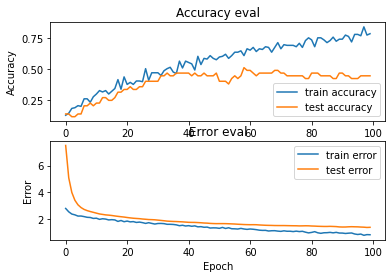

3/3 - 0s - loss: 1.1160 - accuracy: 0.6533 - 22ms/epoch - 7ms/step

Test accuracy: 0.653333306312561
Target: 6, Predicted label: [9]


In [9]:
if __name__ == "__main__":

    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)
    plot_history(history)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    X = X_test[70]
    y = y_test[70]

    predict(model, X, y)